In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
from mpldatacursor import HighlightingDataCursor
from scipy.optimize import curve_fit
import pickle
from scipy.optimize import minimize
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [2]:
filepath = '../../data/covid19/downloaded_data/'

In [3]:
saving_path = '../_generated_files/'
!ls {saving_path}

AllScales24Oct.pkl            dataframe_empty_USA.pikle
All_Pop_Zipf.png              dataframe_empty_brazil.pikle
Brazil24Oct.csv               list_delays_Brazil.pikle
Brazil_Cases_Zipf.png         postcodeCases24Oct.csv
Brazil_by_dates               postcodeCaseswDates24Oct.csv
Chile_26Oct.csv               results_covid19_NSW.pickle
Chile_Cases_Zipf.png          results_covid19_USA.pickle
Chile_wdates23Sept.csv        results_covid19_brazil.pickle
NSW_Cases_Zipf.png            results_covid19_chile.pickle
NSW_SUA_SA2_LGA24Oct.pkl      x_covid19_NSW.pickle
USA14Oct.csv                  x_covid19_USA.pickle
USA14Octstate.csv             x_covid19_brazil.pickle
USA_Cases_Zipf.png            x_covid19_chile.pickle
covid19_NSW.csv               y_covid19_NSW.pickle
covid19_USA.csv               y_covid19_USA.pickle
covid19_brazil.csv            y_covid19_brazil.pickle
covid19_chile.csv             y_covid19_chile.pickle


In [4]:
def retrieve_dataset(country_name):
    '''country_name_optiones = ['Brazil', 'Chile','NSW','USA','USAbyStates']'''
    country_name_options = ['Brazil', 'Chile','NSW','USA','USAbyStates']
    if country_name == 'Brazil':
        return pd.read_csv(saving_path+'covid19_brazil.csv')
    elif country_name == 'Chile':
        return pd.read_csv(saving_path+'covid19_chile.csv')
    elif country_name == 'NSW':
        return pd.read_csv(saving_path+'covid19_NSW.csv')
    elif country_name == 'USA':
        return pd.read_csv(saving_path+'covid19_USA.csv')
    else:
        print('Dataset of {} is not available. Select one of the available options:{}'.format(country_name, country_name_options))

In [5]:
def add_rank_by(df, feature):
    if (feature != 'population') & (feature != 'cases'):
        print('Feature "{}" is not available in the dataset.'.format(feature))
    df.sort_values(by=[feature], inplace=True, ascending=False)
    df[feature+'_Rank']  = range(1, df.shape[0] +1)
    
def dataset_ranked(country_name):
    df = retrieve_dataset(country_name)
    add_rank_by(df, 'population')
    add_rank_by(df, 'cases')
    return df

In [6]:
def power_law(x, a, b):
    return a*np.power(x, b)
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

In [7]:
def plot_zipf_cases(country_name, city_unit, color):
    df = dataset_ranked(country_name)
    df = df.rename(columns={'cases': 'feature','cases_Rank':'feat_rank'})
    names = np.array(list(df['cities']))
    ranks = df['feat_rank'].unique()
    fig = plt.figure()
    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('log')

    x = df['feat_rank']
    y = df['feature']

    y_n = np.asarray(df['feature'])
    x_n = np.asarray(df['feat_rank'])

    i = 0
    for n in names:
        ax.scatter(df['feat_rank'][i], df['feature'][i] , c=color,
                   alpha=0.4, edgecolors='none', label = df['cities'][i], marker = 'o')
        i += 1
    plt.xlabel('Cases Rank')
    plt.ylabel('Cases')
    ax.set_title('Cases Rank per {}'.format(city_unit))
    if country_name == 'USAbyStates':
        plt.suptitle('USA')
    else:
        plt.suptitle(country_name)
    datacursor(formatter='{label}'.format, display='multiple', draggable=True)
    plt.savefig(saving_path+country_name+'_Cases_Zipf', dpi = 1000)
    plt.show()

In [8]:
def plot_zipf_population(country_name, city_unit, color):
    df = dataset_ranked(country_name)
    df = df.rename(columns={'population': 'feature','population_Rank':'feat_rank'})
    names = np.array(list(df['cities']))
    ranks = df['feat_rank'].unique()
    fig = plt.figure()
    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('log')

    x = df['feat_rank']
    y = df['feature']

    y_n = np.asarray(df['feature'])
    x_n = np.asarray(df['feat_rank'])

    i = 0
    for n in names:
        ax.scatter(df['feat_rank'][i], df['feature'][i] , c=color,
                   alpha=0.4, edgecolors='none', label = df['cities'][i], marker = 'o')
        i += 1
    plt.xlabel('Population Rank')
    plt.ylabel('Population')
    ax.set_title('Population Rank per {}'.format(city_unit))
    if country_name == 'USAbyStates':
        plt.suptitle('USA')
    else:
        plt.suptitle(country_name)
    datacursor(formatter='{label}'.format, display='multiple', draggable=True)
    plt.savefig(saving_path+country_name+'_Pop_Zipf', dpi = 1000)
    plt.show()

In [9]:
dict_unit = {'Brazil':'Municipality','Chile':'Comuna', 'NSW':'SUA/SA2/LGA',
             'USA':'County', 'USAbyStates':'State'}

<IPython.core.display.Javascript object>


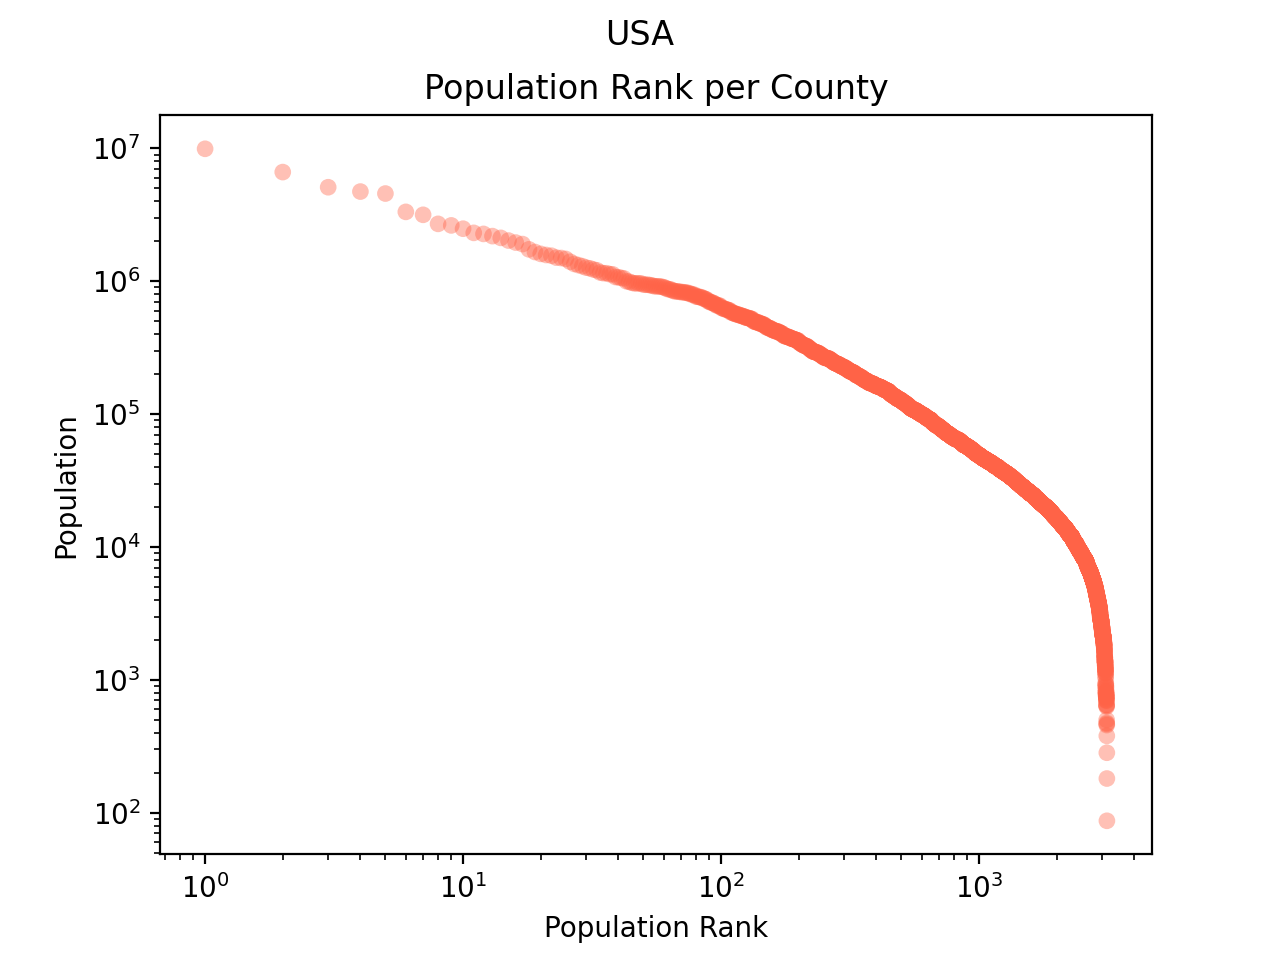

In [10]:
country_name = 'USA'
city_unit = dict_unit[country_name]
plot_zipf_population(country_name, city_unit, color = 'tomato')

<IPython.core.display.Javascript object>


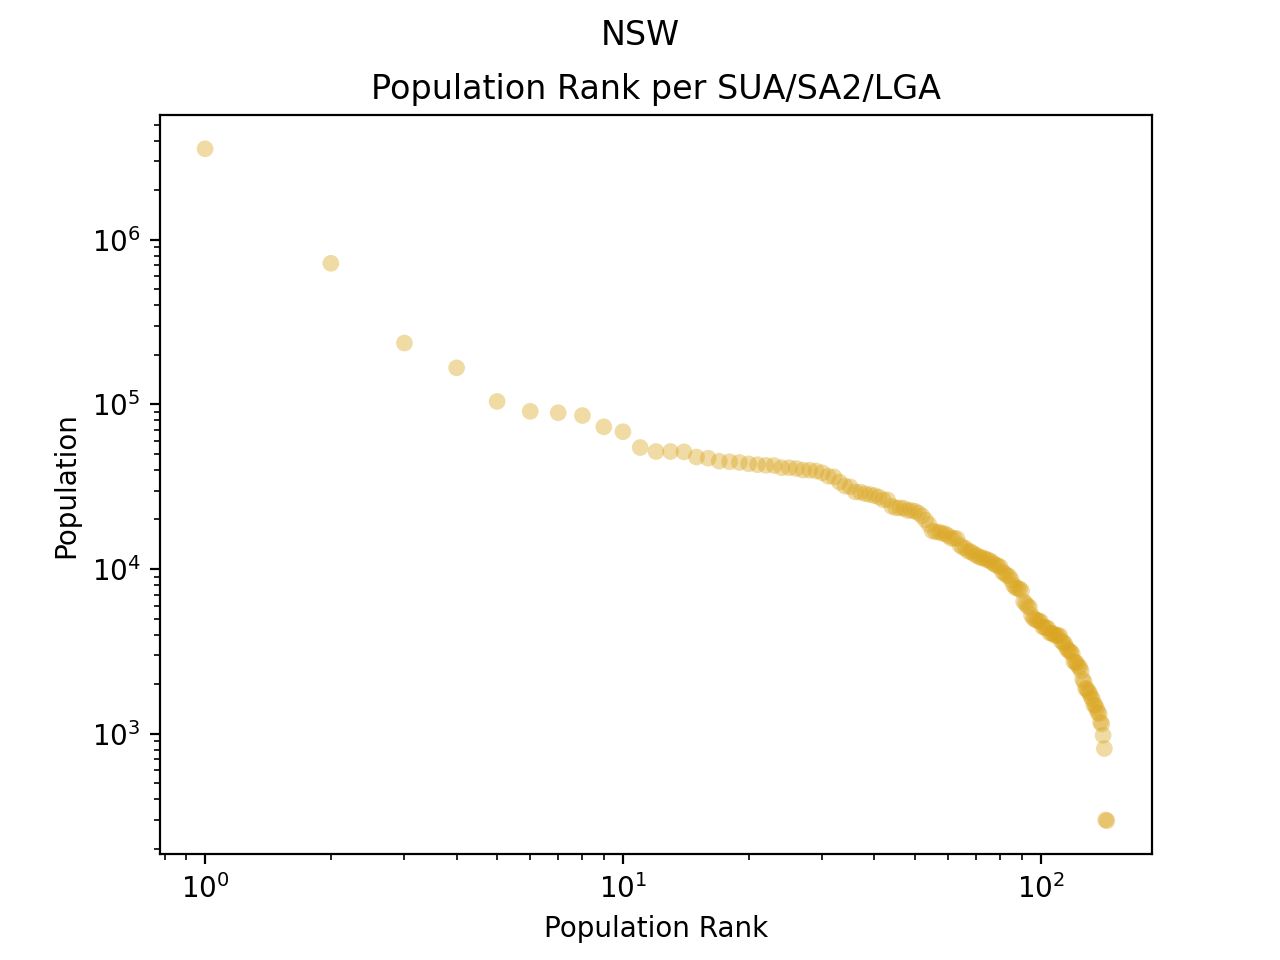

In [11]:
country_name = 'NSW'
city_unit = dict_unit[country_name]
plot_zipf_population(country_name, city_unit, color='goldenrod')

<IPython.core.display.Javascript object>


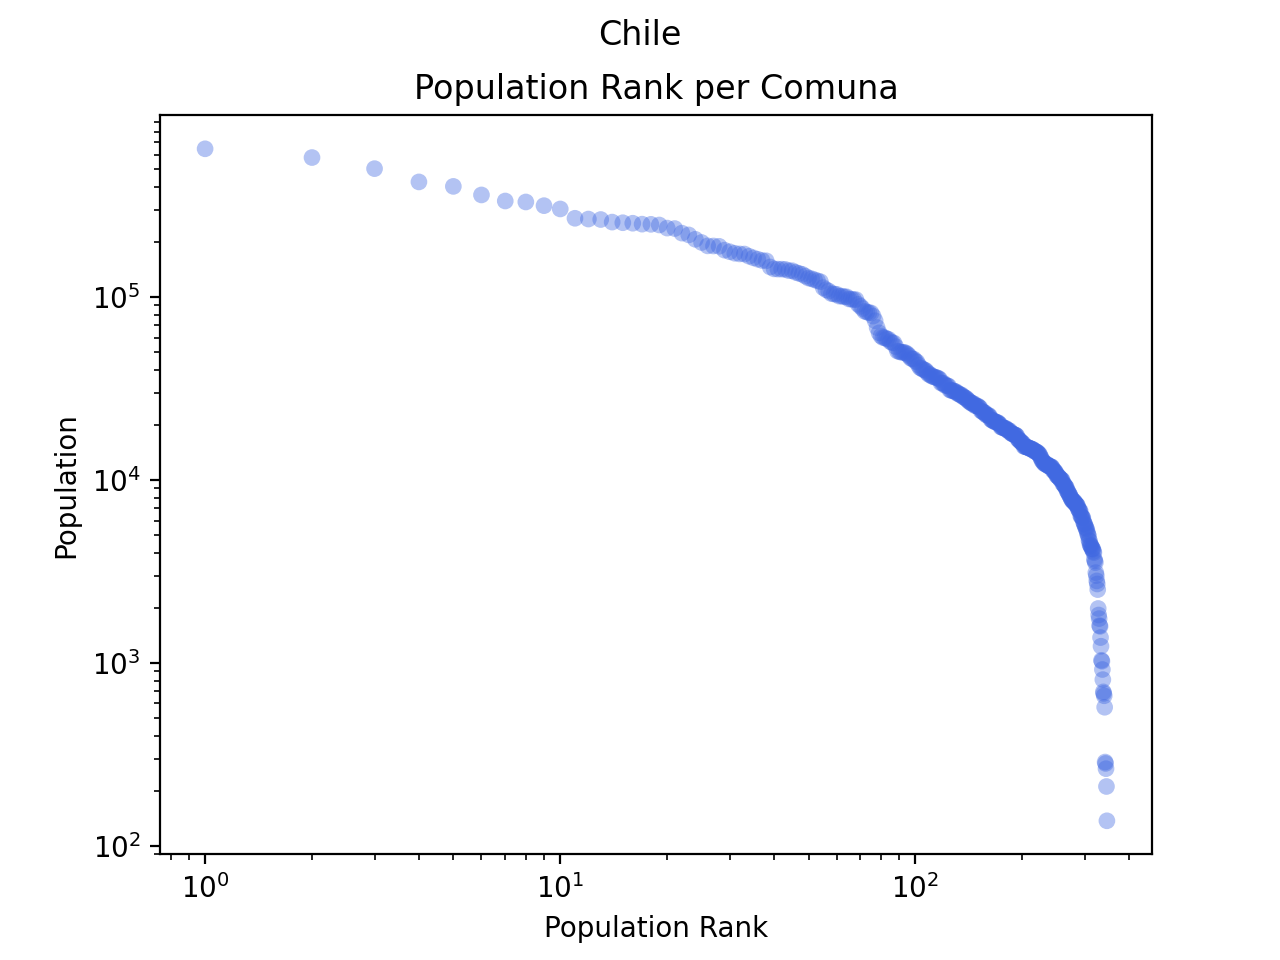

In [12]:
country_name = 'Chile'
city_unit = dict_unit[country_name]
plot_zipf_population(country_name, city_unit, color = 'royalblue')
#Chile: 0.77 #346 comunas

<IPython.core.display.Javascript object>


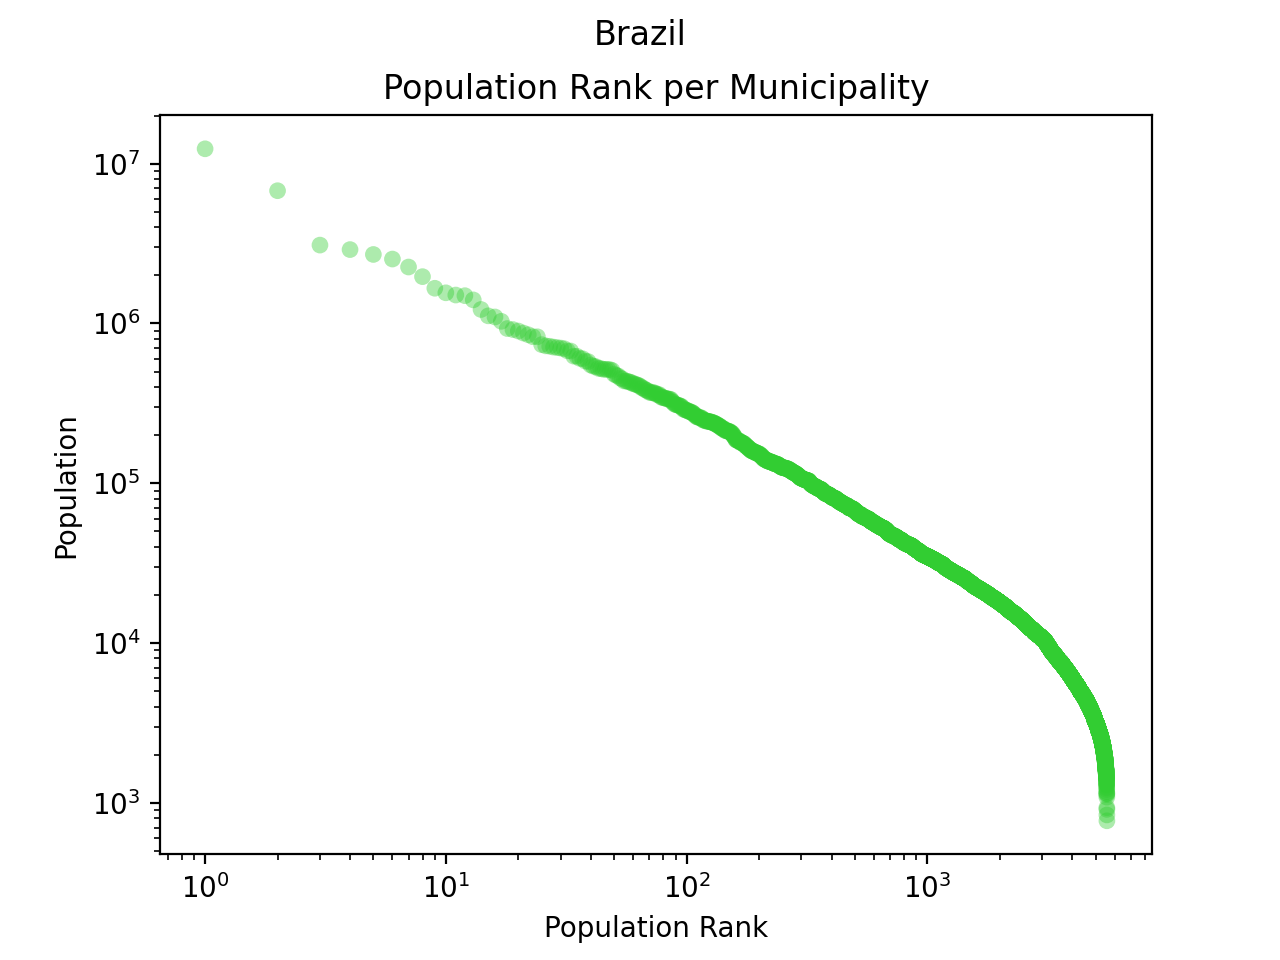

In [13]:
country_name = 'Brazil'
city_unit = dict_unit[country_name]
plot_zipf_population(country_name, city_unit, color='limegreen')
 #Brazil: 0.87 #Municipalities: 5,570

<IPython.core.display.Javascript object>


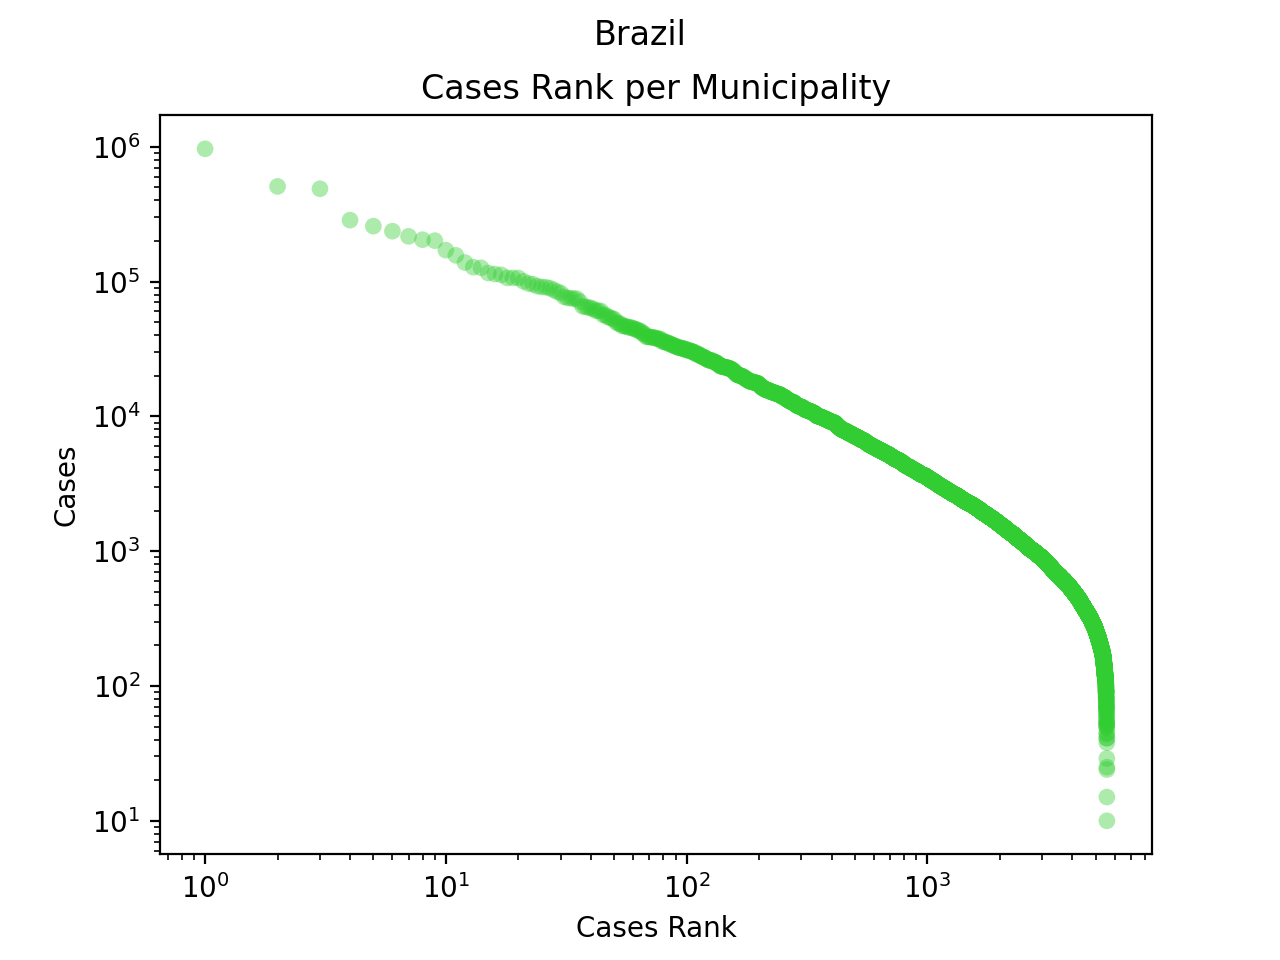

In [14]:
country_name = 'Brazil'
plot_zipf_cases(country_name, city_unit, 'limegreen')
#Brazil: 0.88 #Municipalities: 5,570

<IPython.core.display.Javascript object>


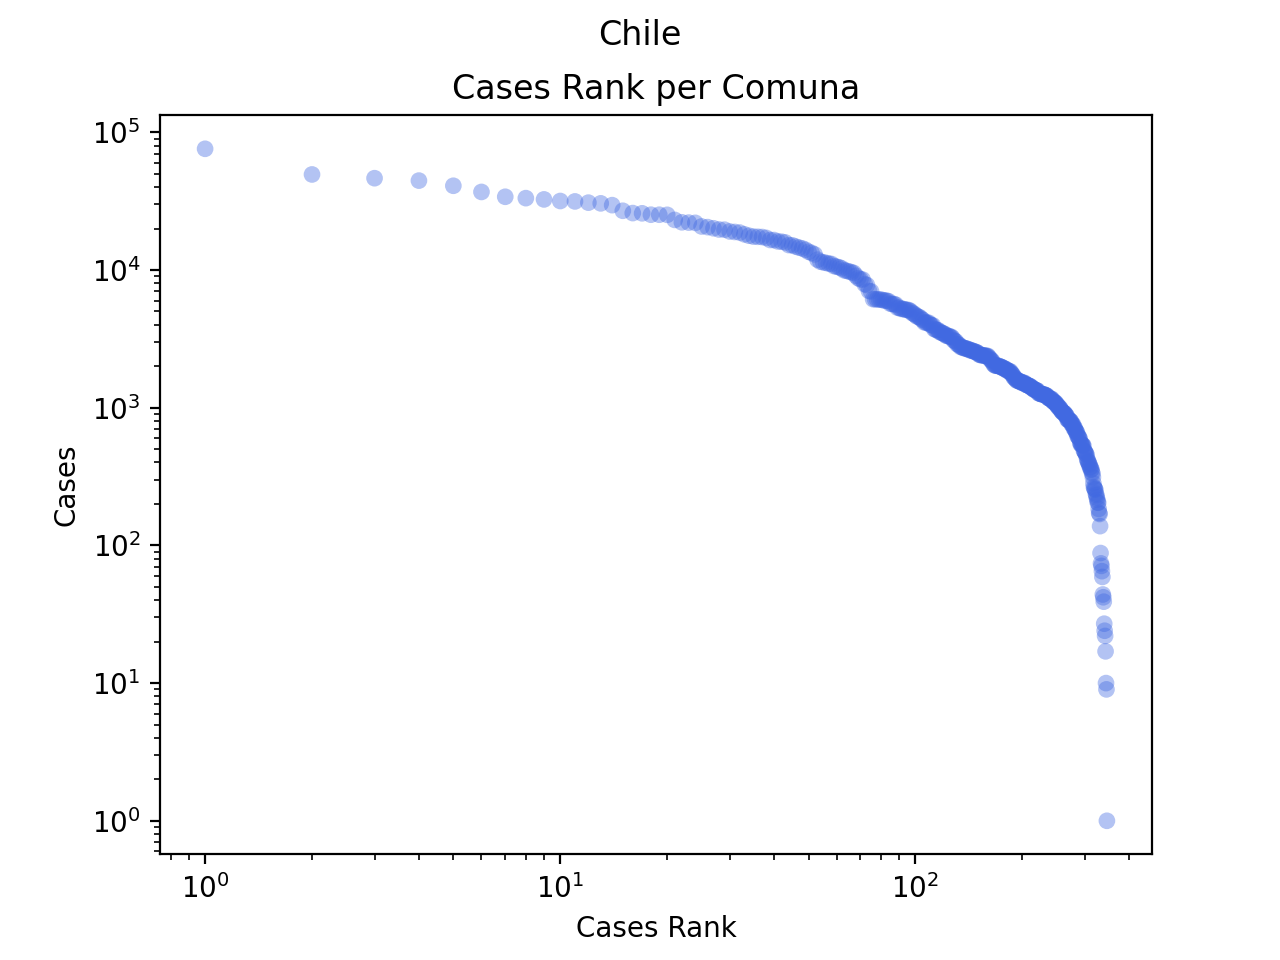

In [15]:
country_name = 'Chile'
city_unit = dict_unit[country_name]
plot_zipf_cases(country_name, city_unit, 'royalblue')
#Chile: 0.78 #Comunas: 346

<IPython.core.display.Javascript object>


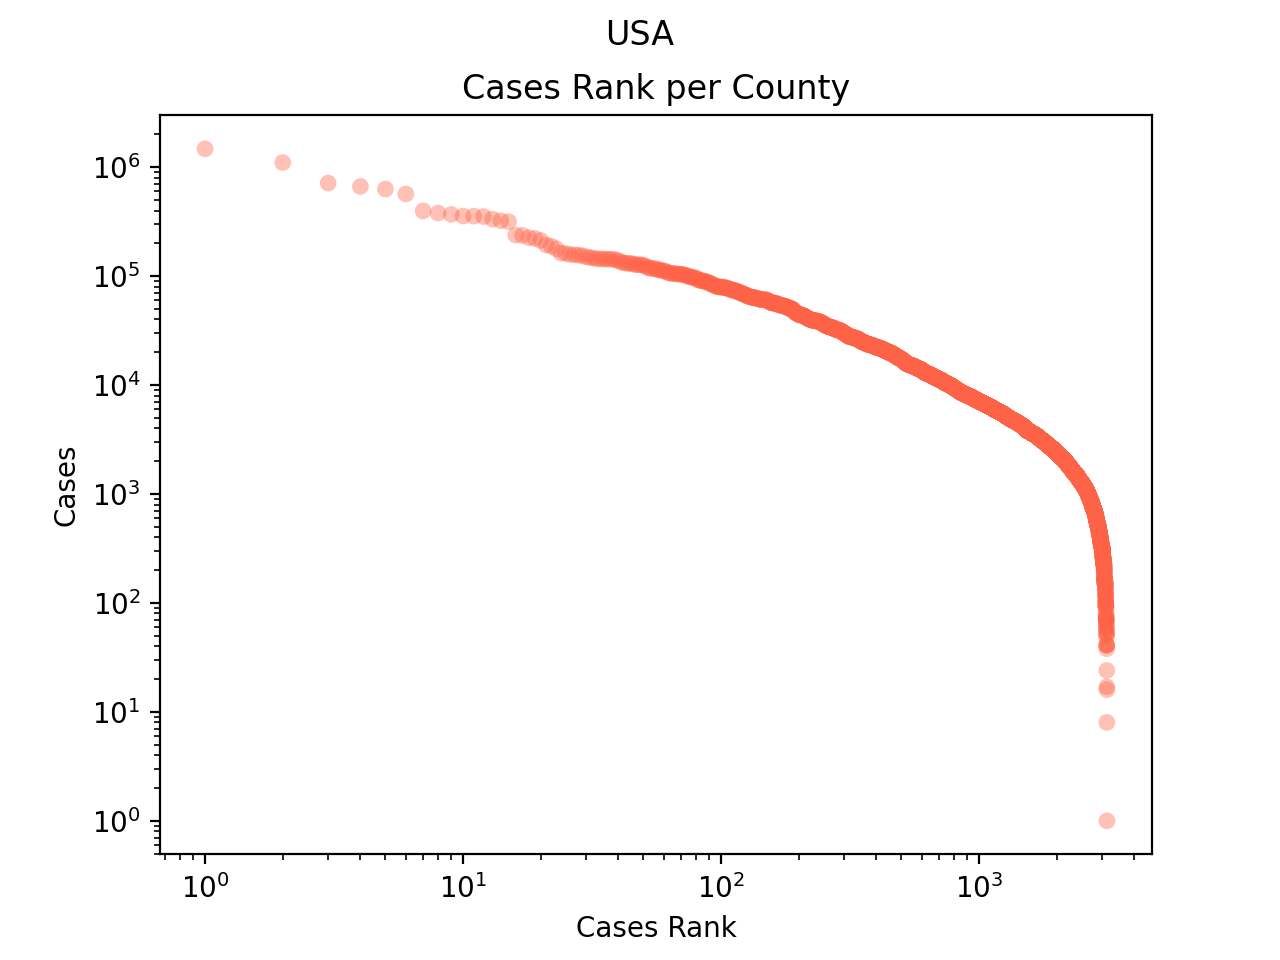

In [16]:
country_name = 'USA'
city_unit = dict_unit[country_name]
plot_zipf_cases(country_name, city_unit, 'tomato')
#USA: 0.78 #Counties: 3131

<IPython.core.display.Javascript object>


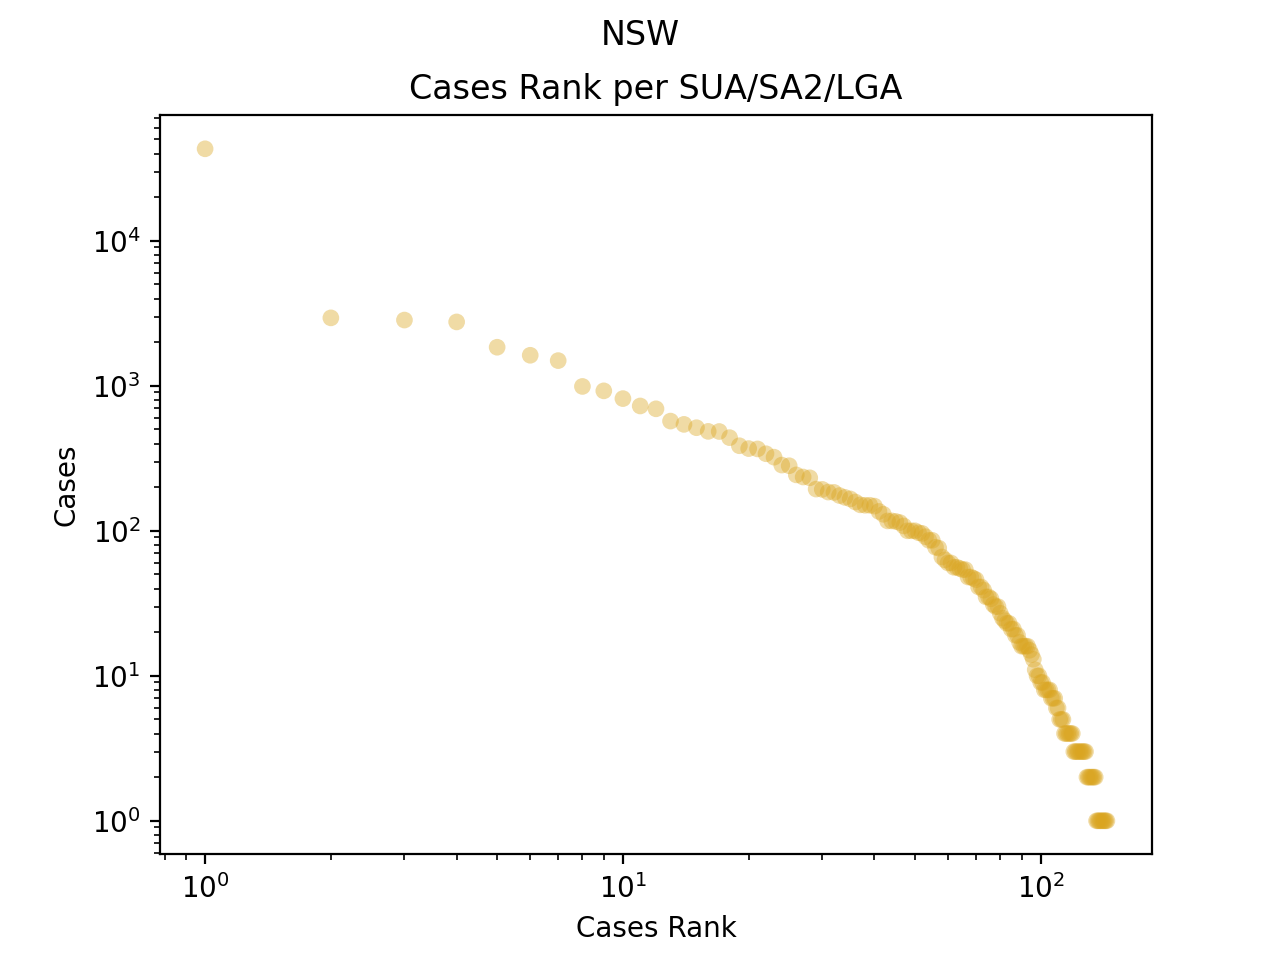

In [17]:
country_name = 'NSW'
city_unit = dict_unit[country_name]
plot_zipf_cases(country_name, city_unit, 'goldenrod')

<IPython.core.display.Javascript object>


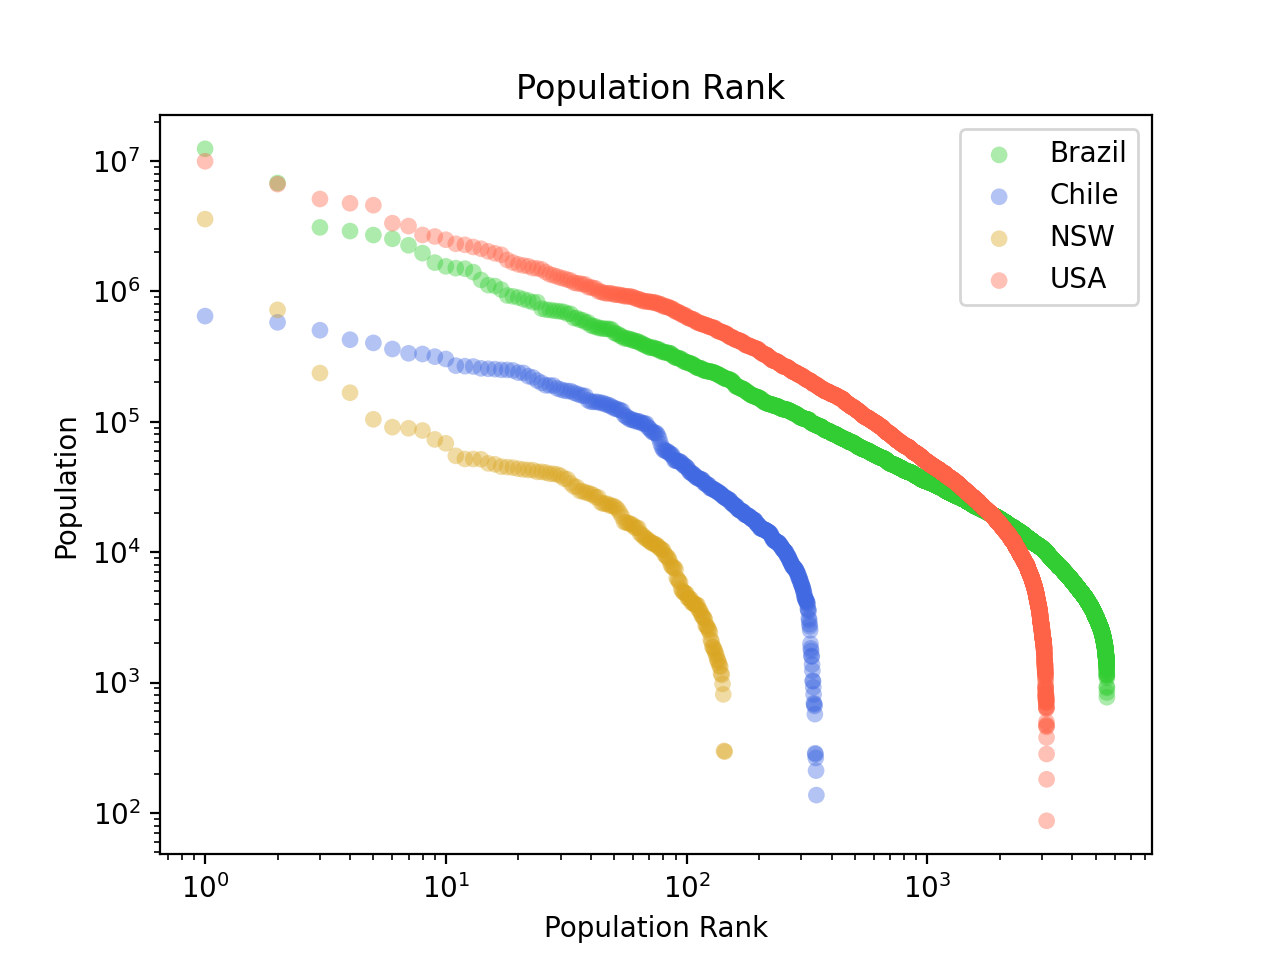

In [19]:
dic_country = {'Brazil':'limegreen', 'Chile': 'royalblue', 'NSW':'goldenrod', 'USA':'tomato'}
fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

for country_name, color in dic_country.items():
    df = dataset_ranked(country_name)
    df = df.rename(columns={'population': 'feature','population_Rank':'feat_rank'})
    names = np.array(list(df['cities']))
    ranks = df['feat_rank'].unique()
    x = df['feat_rank']
    y = df['feature']
    y_n = np.asarray(df['feature'])
    x_n = np.asarray(df['feat_rank'])
    ax.scatter(df['feat_rank'], df['feature'], c=color,
                   alpha=0.4, edgecolors='none', label = country_name, marker = 'o')
    plt.xlabel('Population Rank')
    plt.ylabel('Population')
    ax.set_title('Population Rank ')
    plt.savefig(saving_path+'All_Pop_Zipf', dpi = 1000)
    plt.legend()
    plt.show()